# IMPORTS

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import LinearRegressionModel
from darts.metrics import mae, mse
import matplotlib.pyplot as plt

/Users/cgalbeaza/Personal/Facultate/Licenta/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/cgalbeaza/Personal/Facultate/Licenta/.venv/lib/python3.9/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/Users/cgalbeaza/Personal/Facultate/Licenta/.venv/lib/python3.9/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


# Utils

In [4]:
# Function to load and prepare data
def load_data(ticker="^GSPC", start_date='1990-01-02', end_date='2024-03-20', split_date='2023-01-01'):
    df = yf.download(ticker, start=start_date, end=end_date)
    df['Price'] = df['Close']
    df = df[['Price']]
    
    business_days = pd.date_range(start=start_date, end=end_date, freq='B')
    df = df.reindex(business_days).ffill()

    # Convert the DataFrame into a TimeSeries data type
    price_ts = TimeSeries.from_dataframe(df, value_cols=['Price'], fill_missing_dates=True, freq='B')
    
    # Split the data into train and test TimeSeries
    price_train_ts, price_test_ts = price_ts.split_before(pd.Timestamp(split_date))
    return price_ts, price_train_ts, price_test_ts
    
def train_linear_regression(train_ts):
    model = LinearRegressionModel(lags=12)
    model.fit(train_ts)
    return model

def plot_predictions(test_ts, predicted_ts, title=""):
    plt.figure(figsize=(12, 6))
    test_ts.plot(label='Actual')
    predicted_ts.plot(label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_full_series(full_ts, train_ts, test_ts, predicted_ts, title=""):
    plt.figure(figsize=(15, 8))
    full_ts.plot(label='Full Series')
    test_ts.plot(label='Test Series', color='orange')
    predicted_ts.plot(label='Forecast', color='red')
    plt.axvline(x=train_ts.end_time(), color='green', linestyle='--', label='Train/Test Split')
    plt.title(title)
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed


MSE on test set: 209299.73669183673
MAE on test set: 354.6982462779586


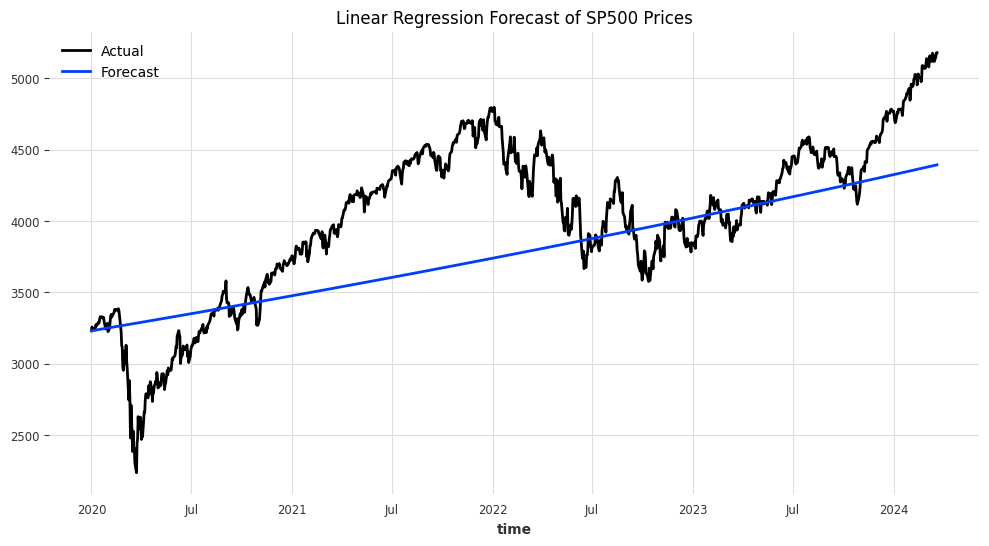

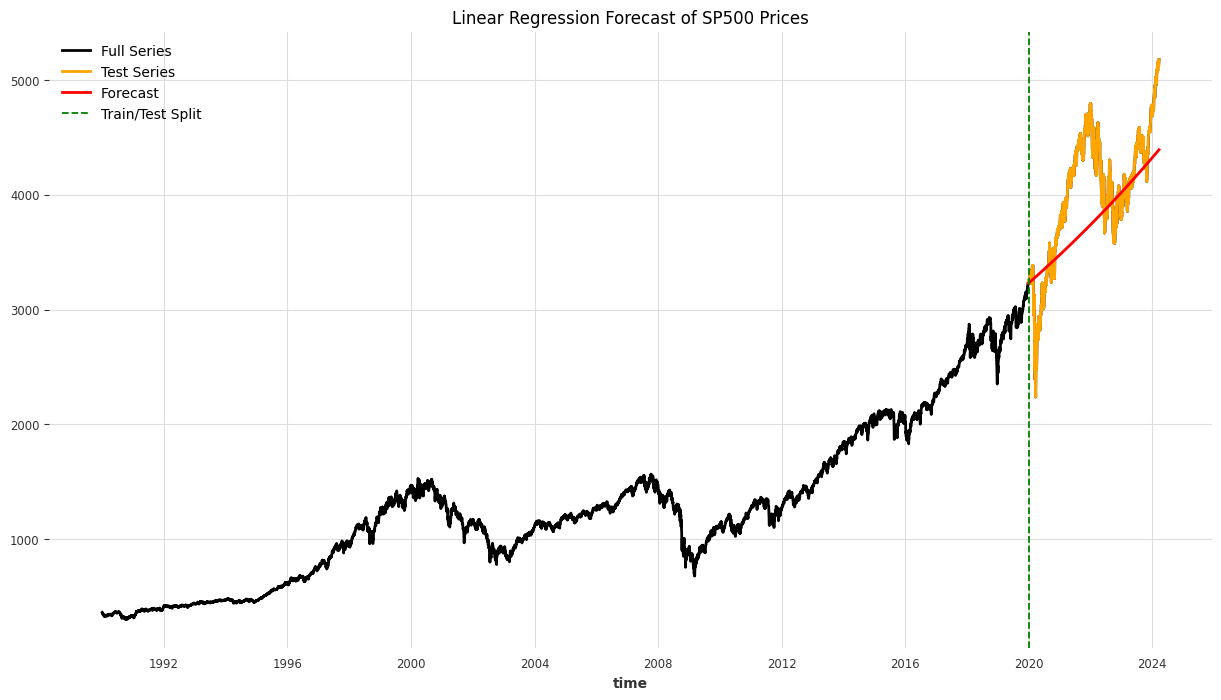

In [6]:
full_ts, price_train_ts, price_test_ts = load_data(split_date="2020-01-01")
model = train_linear_regression(price_train_ts)
predictions_ts = model.predict(len(price_test_ts))

print(f"MSE on test set: {mse(price_test_ts, predictions_ts)}")
print(f"MAE on test set: {mae(price_test_ts, predictions_ts)}")

plot_predictions(price_test_ts, predictions_ts, title="Linear Regression Forecast of SP500 Prices")
plot_full_series(full_ts, price_train_ts, price_test_ts, predictions_ts, title="Linear Regression Forecast of SP500 Prices")